In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
RES_2_8 = 'submissions/best/289322.csv'
RES_2_9 = 'submissions/best/293406.csv'
TEST_CSV = 'data/nyc-taxi/test.csv'

In [12]:
test_df = pd.read_csv(TEST_CSV)

In [13]:
res28_df = pd.read_csv(RES_2_8)
res29_df = pd.read_csv(RES_2_9)

In [14]:
res28_df.describe()

,fare_amount
count,9914.000000
mean,11.444156
std,8.974961
min,3.050505
25%,6.416240
50%,8.678475
75%,12.609973
max,116.580582


In [15]:
res29_df.describe()

,fare_amount
count,9914.000000
mean,11.442914
std,8.972299
min,3.164679
25%,6.375360
50%,8.697456
75%,12.612132
max,119.699490


In [34]:
joined_df = pd.merge(test_df, res28_df,on='key')

In [35]:
joined_df.rename(columns={'fare_amount':'fare28'}, inplace=True)

In [38]:
joined_df = pd.merge(joined_df, res29_df,on='key')

In [39]:
joined_df.rename(columns={'fare_amount':'fare29'}, inplace=True)

In [40]:
joined_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare28,fare29
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,10.432950,10.321324
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,11.443363,11.356156
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,4.365850,4.429494
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,9.229276,8.861422
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,15.853587,15.785589


In [107]:
fare_diff = pd.DataFrame((joined_df.fare28 - joined_df.fare29))
fare_diff.columns = ['val']
fare_diff.reset_index(inplace=True)

In [108]:
fare_diff.head()

,idx,val
0,0,0.111626
1,1,0.087207
2,2,-0.063644
3,3,0.367855
4,4,0.067998


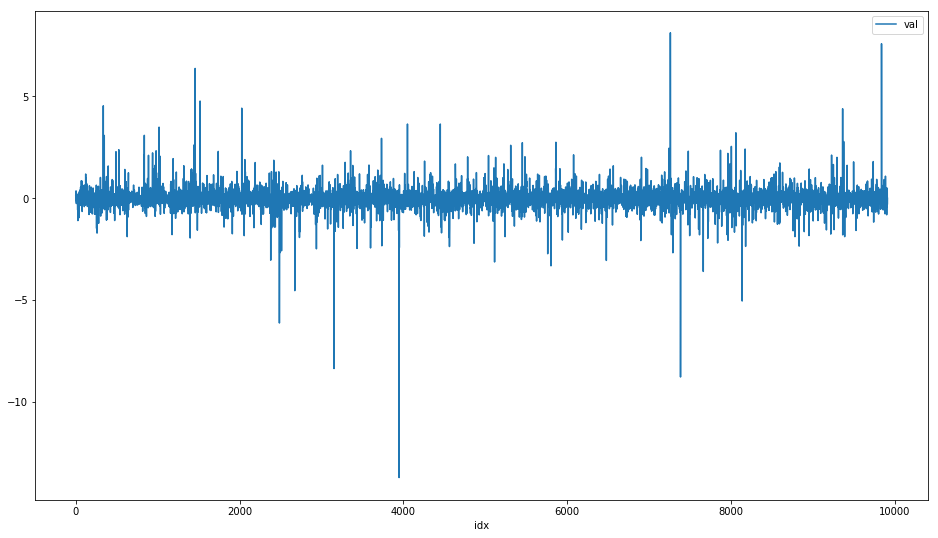

In [110]:
fare_diff.plot(x='idx', y='val',figsize=(16,9))

In [111]:
fare_diff.val.nlargest(10)

7262    8.121826
9841    7.584956
1458    6.373851
1518    4.775228
336     4.541176
2027    4.425479
9366    4.395919
4452    3.647238
4051    3.646904
1017    3.493912
Name: val, dtype: float64

In [112]:
joined_df.iloc[7262]

key                  2012-11-03 17:11:00.00000075
pickup_datetime           2012-11-03 17:11:00 UTC
pickup_longitude                         -73.9717
pickup_latitude                            40.751
dropoff_longitude                        -74.0242
dropoff_latitude                          40.7635
passenger_count                                 2
fare28                                    47.9153
fare29                                    39.7935
Name: 7262, dtype: object